In [232]:
#!nvidia-smi

In [233]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

## Train/test split

In [234]:
provinces = ['BKK','Chiangmai','Khonkaen','Rayong','Saraburi','Surat']
province = provinces[0]

In [235]:
data_training = pd.read_csv(province+'/train/'+province.lower()+'_train_format.csv', date_parser = True)
data_training.sample(5)

,date_time,PM2.5,temp,wind speed,wind dir,lat,long
16918,2019-06-05 22:00:00,22.0,31.5,2.0,245.0,13.729984,100.536443
18685,2019-08-18 13:00:00,14.0,31.6,28.0,280.0,13.729984,100.536443
11266,2018-10-13 10:00:00,36.0,30.8,16.0,75.0,13.729984,100.536443
8115,2018-06-04 03:00:00,10.0,31.1,13.0,260.0,13.729984,100.536443
1576,2017-09-04 16:00:00,16.0,33.9,16.0,265.0,13.729984,100.536443


In [236]:
data_training = data_training.drop(['date_time', 'lat', 'long'], axis = 1)
data_training.head()

,PM2.5,temp,wind speed,wind dir
0,14.0,27.9,16.0,260.0
1,10.0,27.9,16.0,260.0
2,17.0,27.9,16.0,260.0
3,20.0,27.9,16.0,260.0
4,15.0,27.4,16.0,255.0


In [237]:
data_test = pd.read_csv(province+'_clean.csv', date_parser = True)
data_test.sample(5)

,Unnamed: 0,date_time,PM2.5,temp,wind speed,wind dir,lat,long
1942,1942,2020-09-19 22:00:00,11.0,27.5,61,230,13.729984,100.536443
93,93,2020-07-04 21:00:00,9.0,27.8,39,260,13.729984,100.536443
3096,3096,2020-11-07 00:00:00,15.0,27.8,37,60,13.729984,100.536443
2416,2416,2020-10-09 16:00:00,11.0,28.1,34,80,13.729984,100.536443
8202,8202,2021-06-07 18:00:00,NaN,28.9,35,270,13.729984,100.536443


In [238]:
data_test = data_test.drop(['Unnamed: 0', 'lat', 'long'], axis = 1)
data_test.head()

,date_time,PM2.5,temp,wind speed,wind dir
0,2020-07-01 00:00:00,9.0,29.4,35,270
1,2020-07-01 01:00:00,8.0,29.4,42,260
2,2020-07-01 02:00:00,12.0,28.5,42,260
3,2020-07-01 03:00:00,9.0,28.5,42,260
4,2020-07-01 04:00:00,8.0,28.3,55,270


## Normalize data

In [239]:
scaler = MinMaxScaler()
data_training = scaler.fit_transform(data_training)

In [240]:
scaler.inverse_transform(data_training)

array([[ 14. ,  27.9,  16. , 260. ],
       [ 10. ,  27.9,  16. , 260. ],
       [ 17. ,  27.9,  16. , 260. ],
       ...,
       [ 17. ,  30.3,  36. , 265. ],
       [  5. ,  29.4,  35. , 270. ],
       [  7. ,  29.4,  35. , 270. ]])

In [241]:
scale = 1/scaler.scale_
temp = (data_training * scale) + scaler.min_
temp

array([[ 10.97637795,   9.87703349,  16.        , 260.        ],
       [  6.97637795,   9.87703349,  16.        , 260.        ],
       [ 13.97637795,   9.87703349,  16.        , 260.        ],
       ...,
       [ 13.97637795,  12.27703349,  36.        , 265.        ],
       [  1.97637795,  11.37703349,  35.        , 270.        ],
       [  3.97637795,  11.37703349,  35.        , 270.        ]])

In [242]:
data_training[0:10]

array([[0.08661417, 0.51196172, 0.18823529, 0.72222222],
       [0.05511811, 0.51196172, 0.18823529, 0.72222222],
       [0.11023622, 0.51196172, 0.18823529, 0.72222222],
       [0.13385827, 0.51196172, 0.18823529, 0.72222222],
       [0.09448819, 0.48803828, 0.18823529, 0.70833333],
       [0.1023622 , 0.48803828, 0.18823529, 0.70833333],
       [0.15748031, 0.48803828, 0.18823529, 0.70833333],
       [0.15748031, 0.51674641, 0.2       , 0.65277778],
       [0.19685039, 0.51674641, 0.2       , 0.65277778],
       [0.18897638, 0.51674641, 0.2       , 0.65277778]])

In [243]:
X_train = []
y_train = []

for i in range(60, data_training.shape[0]):
    X_train.append(data_training[i-60:i])
    y_train.append(data_training[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)

In [244]:
X_train.shape

(26244, 60, 4)

# Building Model1: LSTM

In [245]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

In [246]:
tf.__version__

'2.8.0'

In [247]:
modelLSTM = Sequential()

modelLSTM.add(LSTM(units = 60, activation = 'relu', return_sequences = True, input_shape = (X_train.shape[1], 4)))
modelLSTM.add(Dropout(0.2))

# modelLSTM.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
# modelLSTM.add(Dropout(0.2))

# modelLSTM.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
# modelLSTM.add(Dropout(0.2))


# modelLSTM.add(LSTM(units = 160, activation = 'relu', return_sequences = True))
# modelLSTM.add(Dropout(0.2))
# modelLSTM.add(LSTM(units = 160, activation = 'relu', return_sequences = True))
# modelLSTM.add(Dropout(0.2))
# modelLSTM.add(LSTM(units = 160, activation = 'relu', return_sequences = True))
# modelLSTM.add(Dropout(0.2))


modelLSTM.add(LSTM(units = 120, activation = 'relu'))
modelLSTM.add(Dropout(0.2))



modelLSTM.add(Dense(units = 1))

In [248]:
modelLSTM.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_57 (LSTM)              (None, 60, 60)            15600     
                                                                 
 dropout_53 (Dropout)        (None, 60, 60)            0         
                                                                 
 lstm_58 (LSTM)              (None, 120)               86880     
                                                                 
 dropout_54 (Dropout)        (None, 120)               0         
                                                                 
 dense_9 (Dense)             (None, 1)                 121       
                                                                 
Total params: 102,601
Trainable params: 102,601
Non-trainable params: 0
_________________________________________________________________


In [249]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

In [250]:
#create callback
filepath = 'my_best_modelLSTM_yourself.hdf5'
checkpoint = ModelCheckpoint(filepath=filepath, 
                             monitor='loss',
                             verbose=0, 
                             save_best_only=True,
                             mode='min')

earlystopping = EarlyStopping(
    monitor='loss', 
    patience=3, 
    min_delta=0, 
    mode='auto'
)

reduce_lr = ReduceLROnPlateau(
    monitor='loss', 
    factor=0.2,   
    patience=2, 
    min_lr=0.001,
    verbose=0
)
callbacks = [checkpoint, earlystopping, reduce_lr]

In [251]:
modelLSTM.compile(optimizer='adam', loss = 'mean_squared_error')

In [252]:
history = modelLSTM.fit(X_train, y_train, epochs=10, batch_size=32, callbacks=callbacks)

Epoch 1/10
821/821 [==============================] - 159s 183ms/step - loss: 0.0051 - lr: 0.0010
Epoch 2/10
821/821 [==============================] - 146s 178ms/step - loss: 0.0029 - lr: 0.0010
Epoch 3/10
821/821 [==============================] - 157s 191ms/step - loss: 0.0025 - lr: 0.0010
Epoch 4/10
821/821 [==============================] - 155s 188ms/step - loss: 0.0023 - lr: 0.0010
Epoch 5/10
821/821 [==============================] - 162s 197ms/step - loss: 0.0022 - lr: 0.0010
Epoch 6/10
821/821 [==============================] - 154s 187ms/step - loss: 0.0022 - lr: 0.0010
Epoch 7/10
821/821 [==============================] - 146s 177ms/step - loss: 0.0021 - lr: 0.0010
Epoch 8/10
821/821 [==============================] - 170s 207ms/step - loss: 0.0021 - lr: 0.0010
Epoch 9/10
821/821 [==============================] - 183s 223ms/step - loss: 0.0020 - lr: 0.0010
Epoch 10/10
821/821 [==============================] - 163s 199ms/step - loss: 0.0020 - lr: 0.0010


# Testing

In [253]:
data_training = pd.read_csv(province+'/train/'+province.lower()+'_train_format.csv', date_parser = True)
data_training = data_training.drop(['date_time', 'lat', 'long'], axis = 1)

In [254]:
data_training.tail(60)

,PM2.5,temp,wind speed,wind dir
26244,14.0,31.6,12.0,260.0
26245,15.0,33.0,11.0,245.0
26246,18.0,33.0,11.0,245.0
26247,14.0,33.0,11.0,245.0
26248,13.0,32.5,15.0,250.0
26249,9.0,32.5,15.0,250.0
26250,9.0,32.5,15.0,250.0
26251,10.0,30.7,17.0,285.0
26252,7.0,30.7,17.0,285.0
26253,10.0,30.7,17.0,285.0


In [255]:
data_test = data_test.drop(['date_time'], axis = 1)
data_test.head()

,PM2.5,temp,wind speed,wind dir
0,9.0,29.4,35,270
1,8.0,29.4,42,260
2,12.0,28.5,42,260
3,9.0,28.5,42,260
4,8.0,28.3,55,270


## Prepare testing data

In [256]:
past_60_days = data_training.tail(60)

In [257]:
df = past_60_days.append(data_test, ignore_index = True)
df.head()

,PM2.5,temp,wind speed,wind dir
0,14.0,31.6,12.0,260.0
1,15.0,33.0,11.0,245.0
2,18.0,33.0,11.0,245.0
3,14.0,33.0,11.0,245.0
4,13.0,32.5,15.0,250.0


In [258]:
df.dropna(inplace=True)

In [259]:
df.shape

(7874, 4)

In [260]:
inputs = scaler.transform(df)
inputs

array([[0.08661417, 0.68899522, 0.14117647, 0.72222222],
       [0.09448819, 0.75598086, 0.12941176, 0.68055556],
       [0.11811024, 0.75598086, 0.12941176, 0.68055556],
       ...,
       [0.08661417, 0.60287081, 0.23529412, 0.69444444],
       [0.08661417, 0.56937799, 0.18823529, 0.68055556],
       [0.08661417, 0.55980861, 0.16470588, 0.65277778]])

In [261]:
X_test = []
y_test = []

for i in range(60, inputs.shape[0]):
    X_test.append(inputs[i-60:i])
    y_test.append(inputs[i, 0])

In [262]:
X_test, y_test = np.array(X_test), np.array(y_test)
X_test.shape, y_test.shape

((7814, 60, 4), (7814,))

## Model prediction

In [263]:
y_pred = modelLSTM.predict(X_test)

In [264]:
y_pred

array([[0.05273877],
       [0.05897909],
       [0.05592838],
       ...,
       [0.08067356],
       [0.08025495],
       [0.08250511]], dtype=float32)

In [265]:
scaler.scale_

array([0.00787402, 0.04784689, 0.01176471, 0.00277778])

In [266]:
scale = 1/scaler.scale_[0]
scale

127.0

In [267]:
y_pred = y_pred*scale
y_test = y_test*scale

In [268]:
import math
from sklearn.metrics import mean_squared_error

print(province+' RMSE =', math.sqrt(mean_squared_error(y_test, y_pred)) )

BKK RMSE = 2.402616913861161


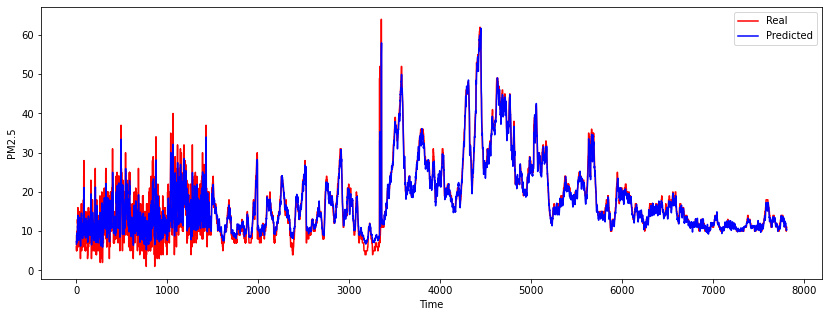

In [269]:
# Visualising the results
plt.figure(figsize=(14,5))
plt.plot(y_test, color = 'red', label = 'Real')
plt.plot(y_pred, color = 'blue', label = 'Predicted')
plt.xlabel('Time')
plt.ylabel('PM2.5')
plt.legend()
plt.show()

In [270]:
import pickle

with open('lstm_'+province.lower()+'_3.pickle', 'wb') as fp:
    pickle.dump(y_pred, fp)

In [271]:
df1 = pd.DataFrame(y_pred)

In [272]:
df1.to_csv('lstm_'+province.lower()+'_3.csv')